In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#
#from sklearn.linear_model import LinearRegression
#from sklearn.model_selection import train_test_split

In [73]:
### Carga datos de dataset
### Contiene aproximadamente 10 años de observaciones diarias de variables climáticas: temperatura, dirección y velocidad del viento, humedad, presión, nubosidad, y cantidad de lluvia en mm.
### tras observar los datos del día de hoy, el objetivo es predecir las variables target:
###                                                                                     -RainFallTomorrow: cantidad de lluvia del día posterior a la observación. Problema de Regresión.
###                                                                                     -RainTomorrow: si el día siguiente llueve o no llueve. Problema de Clasificación.
file_path= 'weatherAUS.csv'
df = pd.read_csv(file_path, sep=',',engine='python')

In [74]:
### Vista de datos
df.head()

,Unnamed: 0,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
0,0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,0.0
1,1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,0.0
2,2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,0.0
3,3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,1.0
4,4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,0.2


In [75]:
### Columnas, ¿cuáles son las variables de nuestra base?
df.columns

Index(['Unnamed: 0', 'Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall',
       'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow', 'RainfallTomorrow'],
      dtype='object')

In [76]:
#eliminamos la columna unnamed:0 pq es como un índice
df = df.drop('Unnamed: 0', axis = 1)

In [77]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainfallTomorrow
count,143928.000000,144159.000000,142152.000000,82658.000000,75616.000000,135159.000000,143645.000000,142351.000000,142759.000000,140907.000000,130351.000000,130388.000000,89542.000000,86076.000000,143646.000000,141805.000000,142153.000000
mean,12.195873,23.223176,2.361516,5.468616,7.611241,40.036564,14.044742,18.663164,68.877290,51.537432,1017.649277,1015.255184,4.447287,4.509770,16.992780,21.685249,2.361242
std,6.398018,7.118770,8.479338,4.193871,3.785612,13.607212,8.915610,8.810276,19.029576,20.796720,7.107132,7.037981,2.887161,2.720306,6.488045,6.936358,8.479084
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


In [78]:
# Vemos todas las localidades que tiene nuestra base de datos
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [120]:
# Las localidades que queremos evaluar son Adelaide, Canberra, Cobar, Dartmoor, Melbourne, MelbourneAirport, MountGambier, Sydney y SydneyAirport. El resto las eliminamos según el enunciado del tp
categorias_importantes = [' Adelaide', 'Canberra', 'Cobar', 'Dartmoor', 'Melbourne', 'MelbourneAirport', 'MountGambier', 'Sydney', 'SydneyAirport' ]
df_filtrado = df[df['Location'].isin(categorias_importantes)]

![Australia](Australia.JPG)

Como vemos que las localidades están muy alejadas y esto puede influenciar en algunas de las variables de nuestro data set (como la evaporación, la cantidad de lluvia por día, etc) elegimos descartar la variable location para poder concentrarnos en el resto de las variables.
(ya que el enunciado lo daba como posibilidad)

In [123]:
#eliminamos la columna location
df_filtrado = df_filtrado.drop('Location', axis = 1)

In [124]:
#miramos cuantos datos nos quedan en el data set, las variables y su tipo y cuantos datos nulos tienen
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25041 entries, 6047 to 102519
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              25041 non-null  object 
 1   MinTemp           24473 non-null  float64
 2   MaxTemp           24485 non-null  float64
 3   Rainfall          24157 non-null  float64
 4   Evaporation       22176 non-null  float64
 5   Sunshine          19751 non-null  float64
 6   WindGustDir       23421 non-null  object 
 7   WindGustSpeed     23424 non-null  float64
 8   WindDir9am        23667 non-null  object 
 9   WindDir3pm        24620 non-null  object 
 10  WindSpeed9am      24688 non-null  float64
 11  WindSpeed3pm      24706 non-null  float64
 12  Humidity9am       24106 non-null  float64
 13  Humidity3pm       24156 non-null  float64
 14  Pressure9am       24210 non-null  float64
 15  Pressure3pm       24219 non-null  float64
 16  Cloud9am          18866 non-null  float64

In [125]:
### Cantidad de valores faltantes.

df_filtrado.isna().sum()

Date                   0
MinTemp              568
MaxTemp              556
Rainfall             884
Evaporation         2865
Sunshine            5290
WindGustDir         1620
WindGustSpeed       1617
WindDir9am          1374
WindDir3pm           421
WindSpeed9am         353
WindSpeed3pm         335
Humidity9am          935
Humidity3pm          885
Pressure9am          831
Pressure3pm          822
Cloud9am            6175
Cloud3pm            6358
Temp9am              580
Temp3pm              572
RainToday            884
RainTomorrow         883
RainfallTomorrow     883
dtype: int64

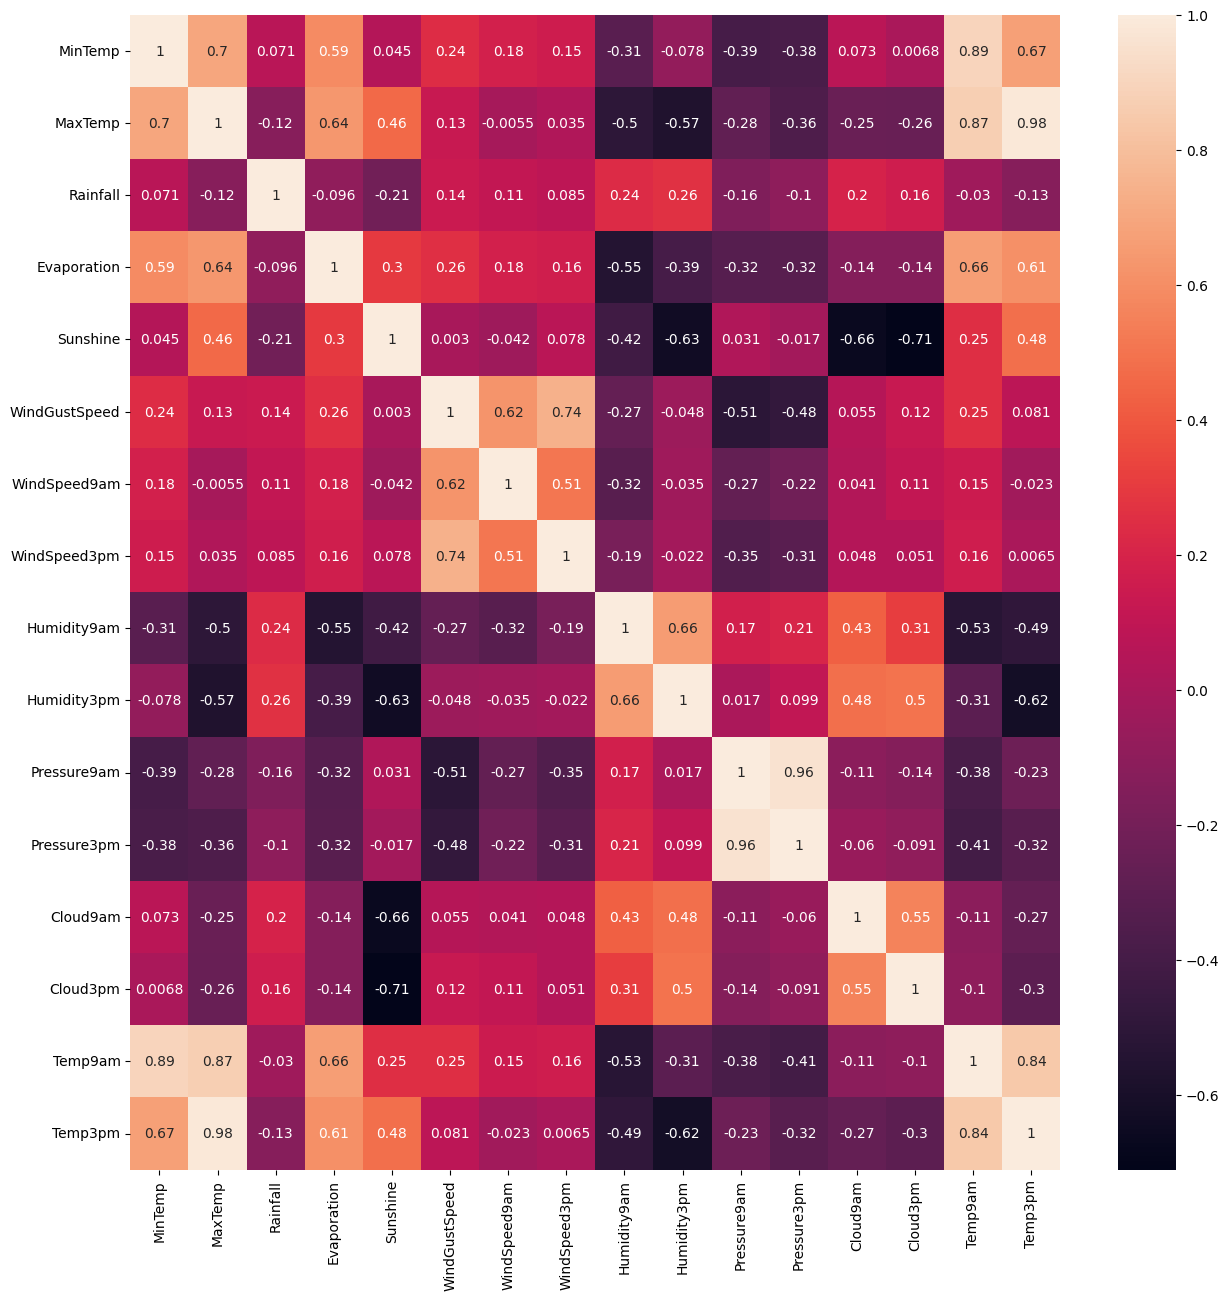

In [126]:
plt.figure(figsize=(15,15))
sns.heatmap(df_filtrado[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']].corr(), annot=True)
plt.show()

Como eliminamos la variable location ahora nos quedan 8 registros por día, por ende vamos a intentar llenar los nulos de las variables con una medida resumen por día

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


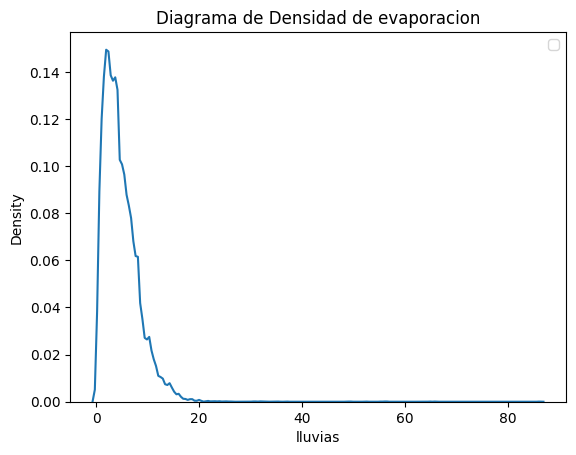

In [136]:
# Vemos como se ditribuye la evaporacion
# Grafica el diagrama de densidades utilizando seaborn
bandwidth = 0.5
sns.kdeplot(data=df_filtrado['Evaporation'], bw_adjust=bandwidth)
plt.title('Diagrama de Densidad de evaporacion')
plt.xlabel('lluvias')
plt.legend()

como vemos muchos outliers vamos a usar la mediana por estacion en vez de la media

In [83]:
# Imputamos los valores faltantes de Evaporation con la mediana calculada por dia
mediana_Evaporation = df_filtrado.groupby('Date')['Evaporation'].median()
df_filtrado['Evaporation'] = df_filtrado.apply(lambda x: mediana_Evaporation[x['Date']] if pd.isnull(x['Evaporation']) else x['Evaporation'], axis=1)

C:\Users\u631832\AppData\Local\Temp\ipykernel_17404\1896634980.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Evaporation'] = df_filtrado.apply(lambda x: mediana_Evaporation[x['Date']] if pd.isnull(x['Evaporation']) else x['Evaporation'], axis=1)


In [84]:
# Verificamos que Evaporation no tenga valores nulos
df_filtrado['Evaporation'].isnull().sum()

0

In [127]:
#vamos a crear una variable que sea epocas del año porque la lluvia en invierno es diferente a la del verano por ejemplo.
# Primero tengo que convertir a la variable date en tipo datetime
df_filtrado = df_filtrado.copy()  # Crear una copia del DataFrame
df_filtrado['Date'] = pd.to_datetime(df_filtrado['Date'])
df_filtrado['Date'].head()

6047   2009-01-01
6048   2009-01-02
6049   2009-01-03
6050   2009-01-04
6051   2009-01-05
Name: Date, dtype: datetime64[ns]

In [128]:
# Armamos una función para determinar las estaciones del año (usamos las estaciones de australia) 
#Otoño: del 1 de marzo al 31 de mayo. 
#Invierno: del 1 de junio al 31 de agosto. 
#Primavera: del 1 de septiembre al 30 de noviembre. 
#Verano: del 1 de diciembre al 28 de febrero.
def determinar_estacion(fecha):
    # extraemos el mes
    mes = fecha.month
    # Determinamos las estaciones
    if  3<= mes <=5:
        return "Otoño"
    elif 6<= mes <= 8:
        return "Invierno"
    elif 9 <= mes <= 11:
        return "Primavera"
    else:
        return "Verano"

# Aplicamos la función determinar_estacion al DataFrame df_filtrado
df_filtrado['Estacion'] = df_filtrado['Date'].apply(lambda x: determinar_estacion(x))

# Mostramos el DataFrame con la nueva columna de estaciones
df_filtrado.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Estacion
6047,2009-01-01,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0.0,Verano
6048,2009-01-02,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0.0,Verano
6049,2009-01-03,15.5,34.1,0.0,12.6,13.3,SE,30.0,NaN,N,...,NaN,1011.6,NaN,1.0,NaN,32.7,No,No,0.0,Verano
6050,2009-01-04,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0.0,Verano
6051,2009-01-05,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0.0,Verano


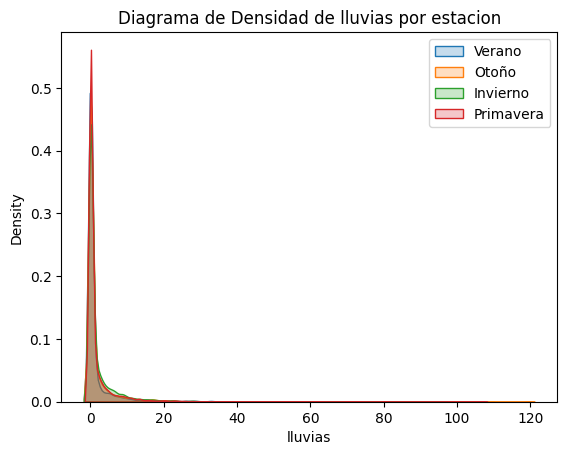

In [134]:
# Separa los datos por dependencia:
verano_data = df_filtrado[df_filtrado['Estacion'] == 'Verano']
otoño_data = df_filtrado[df_filtrado['Estacion'] == 'Otoño']
invierno_data = df_filtrado[df_filtrado['Estacion'] == 'Invierno']
primavera_data = df_filtrado[df_filtrado['Estacion'] == 'Primavera']
# Grafica el diagrama de densidades utilizando seaborn
bandwidth = 0.5
sns.kdeplot(data=verano_data['Rainfall'], fill=True, label='Verano', bw_adjust=bandwidth)
sns.kdeplot(data=otoño_data['Rainfall'], fill=True, label='Otoño', bw_adjust=bandwidth)
sns.kdeplot(data=invierno_data['Rainfall'], fill=True, label='Invierno', bw_adjust=bandwidth)
sns.kdeplot(data=primavera_data['Rainfall'], fill=True, label='Primavera', bw_adjust=bandwidth)
plt.title('Diagrama de Densidad de lluvias por estacion')
plt.xlabel('lluvias')
plt.legend()

Text(0.5, 1.0, 'Rainfall')

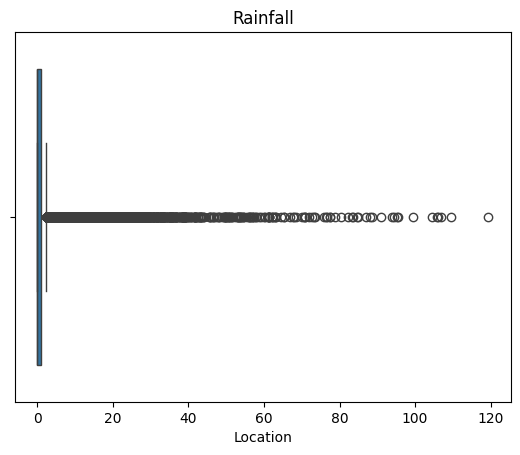

In [135]:
# Vemos como se ditribuye la evaporacion según las estaciones para ver si podemos sacar la media según estacion
sns.boxplot(x='Rainfall', data=df_filtrado)
plt.xlabel('Location')
plt.title('Rainfall')

In [85]:
# Como vemos que la distribución de la lluvia no se diferencia por estación decidimos rellenar 'Rainfall' por día. Usamos la mediana por la cantidad de valores outliers que tiene
mediana_Rainfall = df_filtrado.groupby('Date')['Rainfall'].median()

for index, row in df_filtrado.iterrows():
    if pd.isnull(row['Rainfall']):
        # Si el valor de 'Rainfall' es nulo, rellenar con la mediana correspondiente al día
        df_filtrado.at[index, 'Rainfall'] = mediana_Rainfall.loc[row['Date']]
        
# df_filtrado['Rainfall'] = df_filtrado.apply(lambda x: mediana_Rainfall[x['Date']] if pd.isnull(x['Rainfall']) else x['Rainfall'], axis=1)

In [86]:
# Verificamos que no hayan quedado valores sin asignar 
df_filtrado['Rainfall'].isnull().sum()

0

In [87]:
# Imputamos los valores faltantes de Sunshine con la mediana calculada por dia 
mediana_Sunshine = df_filtrado.groupby('Date')['Sunshine'].median()

df_filtrado['Sunshine'] = df_filtrado.apply(lambda x: mediana_Sunshine[x['Date']] if pd.isnull(x['Sunshine']) else x['Sunshine'], axis=1)

C:\Users\u631832\AppData\Local\Temp\ipykernel_17404\1120628530.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Sunshine'] = df_filtrado.apply(lambda x: mediana_Sunshine[x['Date']] if pd.isnull(x['Sunshine']) else x['Sunshine'], axis=1)


In [88]:
# Verificamos que no hayan quedado valores de Sunshine sin imputar
df_filtrado['Sunshine'].isnull().sum()

0

In [89]:
# Imputamos los valores faltantes de WindGustSpeed con la mediana clculada por dia 
mediana_WindGustSpeed = df_filtrado.groupby('Date')['WindGustSpeed'].median()

df_filtrado['WindGustSpeed'] = df_filtrado.apply(lambda x: mediana_WindGustSpeed[x['Date']] if pd.isnull(x['WindGustSpeed']) else x['WindGustSpeed'], axis=1)

C:\Users\u631832\AppData\Local\Temp\ipykernel_17404\3382770590.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['WindGustSpeed'] = df_filtrado.apply(lambda x: mediana_WindGustSpeed[x['Date']] if pd.isnull(x['WindGustSpeed']) else x['WindGustSpeed'], axis=1)


In [90]:
# Verificamos que no hayan quedado valores de WindGustSpeed sin imputar
df_filtrado[df_filtrado['WindGustSpeed'].isna()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow
30286,2008-05-30,Sydney,10.9,21.0,0.2,1.4,5.6,NaN,NaN,W,...,58.0,1032.0,1028.7,1.0,2.0,12.7,19.6,No,No,0.0
45784,2008-05-30,Canberra,-0.1,18.0,0.0,2.0,8.6,NaN,NaN,N,...,46.0,1033.2,1028.7,1.0,1.0,5.6,17.4,No,No,0.0


In [91]:
df_filtrado[df_filtrado['Date'] == '2008-05-30'][['Date', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']]
# Para esta fecha (2008-05-30), hay solo dos ciudades donde tomaron datos, y ninguno de los dos tiene valores en WindGustSpeed,
# asi que vamos a imputar por el mayor entre WindSpeed9am y WindSpeed3pm

if df_filtrado['WindGustSpeed'].isnull().any():
    df_filtrado['WindGustSpeed'] = np.maximum(df_filtrado['WindSpeed3pm'], df_filtrado['WindSpeed9am'])


C:\Users\u631832\AppData\Local\Temp\ipykernel_17404\1749971764.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['WindGustSpeed'] = np.maximum(df_filtrado['WindSpeed3pm'], df_filtrado['WindSpeed9am'])


In [92]:
# Vemos que se hayan asignado correctamente los valores 
df_filtrado[df_filtrado['Date'] == '2008-05-30'][['Date', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']]


,Date,WindGustSpeed,WindSpeed9am,WindSpeed3pm
30286,2008-05-30,19.0,19.0,7.0
45784,2008-05-30,15.0,2.0,15.0


In [93]:
# Imputamos los valores de WindSpeed9am y WindSpeed3pm por fecha utilizando la mediana
mediana_WindSpeed9am = df_filtrado.groupby('Date')['WindSpeed9am'].median()

df_filtrado['WindSpeed9am'] = df_filtrado.apply(lambda x: mediana_WindSpeed9am[x['Date']] if pd.isnull(x['WindSpeed9am']) else x['WindSpeed9am'], axis=1)

mediana_WindSpeed3pm = df_filtrado.groupby('Date')['WindSpeed3pm'].median()

df_filtrado['WindSpeed3pm'] = df_filtrado.apply(lambda x: mediana_WindSpeed3pm[x['Date']] if pd.isnull(x['WindSpeed3pm']) else x['WindSpeed3pm'], axis=1)

C:\Users\u631832\AppData\Local\Temp\ipykernel_17404\2274982528.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['WindSpeed9am'] = df_filtrado.apply(lambda x: mediana_WindSpeed9am[x['Date']] if pd.isnull(x['WindSpeed9am']) else x['WindSpeed9am'], axis=1)
C:\Users\u631832\AppData\Local\Temp\ipykernel_17404\2274982528.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['WindSpeed3pm'] = df_filtrado.apply(lambda x: mediana_WindSpeed3pm[x['Date']] if pd.isnull(x['WindSpeed3pm']) else x

In [94]:
# Verificamos que no hayan quedado nulos
df_filtrado['WindSpeed9am'].isnull().sum()
df_filtrado['WindSpeed3pm'].isnull().sum()

0

In [95]:
# Para los valores de WindGustDir, WindDir9am, y WindDir3pm, verificamos cuantos tienen los tres valores iguales 
df_filtrado['Todos_Iguales'] = (df_filtrado['WindGustDir'].notna()) & (df_filtrado['WindDir9am'].notna()) & (df_filtrado['WindDir3pm'].notna()) & (df_filtrado['WindGustDir'] == df_filtrado['WindDir9am']) & (df_filtrado['WindGustDir'] == df_filtrado['WindDir3pm'])

df_filtrado['Todos_Iguales'].sum()

C:\Users\u631832\AppData\Local\Temp\ipykernel_17404\3825600201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Todos_Iguales'] = (df_filtrado['WindGustDir'].notna()) & (df_filtrado['WindDir9am'].notna()) & (df_filtrado['WindDir3pm'].notna()) & (df_filtrado['WindGustDir'] == df_filtrado['WindDir9am']) & (df_filtrado['WindGustDir'] == df_filtrado['WindDir3pm'])


2173

In [96]:
# Verificamos si hay datos de Wind que tengan valores faltantes en las tres columnas (no podriamos completar por este método)
df_filtrado[['WindDir9am', 'WindDir3pm', 'WindGustDir']].isna().all(axis=1).sum()

313

In [40]:
# Como hay 313 valores que no tienen datos ninguna de las tres columnas. Vamos a completar los valores por día 
# Utilizamos la moda porque es un valor categórico
# Calculamos la moda por fecha, para cada variable, y si todas las localidades tienen NaN, completa con None 
moda_Wind = df_filtrado.groupby('Date')[['WindDir9am', 'WindDir3pm', 'WindGustDir']].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Unimos las modas obtenidas con el DataFrame original para luego poder imputar
df_filtrado = pd.merge(df_filtrado, moda_Wind, on='Date', suffixes=('', '_moda'))

# Completamos los valores faltantes utilizando la moda correspondiente
df_filtrado['WindGustDir'].fillna(df_filtrado['WindGustDir_moda'], inplace=True)
df_filtrado['WindDir9am'].fillna(df_filtrado['WindDir9am_moda'], inplace=True)
df_filtrado['WindDir3pm'].fillna(df_filtrado['WindDir3pm_moda'], inplace=True)

# Eliminamos las columnas de moda porque ya no nos van a servir más
df_filtrado.drop(columns=['WindGustDir_moda', 'WindDir9am_moda', 'WindDir3pm_moda'], inplace=True)


C:\Users\u631832\AppData\Local\Temp\ipykernel_17404\396454794.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtrado['WindGustDir'].fillna(df_filtrado['WindGustDir_moda'], inplace=True)
C:\Users\u631832\AppData\Local\Temp\ipykernel_17404\396454794.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [41]:
# Verificamos que todos los valores sean distintos de None
df_filtrado[['WindDir9am', 'WindDir3pm', 'WindGustDir']].isna().any()

WindDir9am      True
WindDir3pm     False
WindGustDir     True
dtype: bool

In [42]:
df_filtrado[df_filtrado['WindDir9am'].isna()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Todos_Iguales
3034,2008-02-27,Sydney,19.0,29.0,22.2,8.2,3.3,W,15.0,NaN,...,1014.1,1010.6,7.0,7.0,21.3,24.7,Yes,Yes,4.2,False
9477,2008-02-27,Canberra,11.7,27.6,0.0,7.8,8.1,W,NaN,NaN,...,1013.6,1009.1,2.0,6.0,17.6,26.8,No,No,0.0,False


In [43]:
# Observamos que la fecha dónde no tenemos ningún valor de WindDir9am, los valores de WindGustDir coinciden, 
#asi que decidimos imputar los valores con el valor de WindGustDir.

df_filtrado.loc[df_filtrado['WindDir9am'].isna(), 'WindDir9am'] = df_filtrado.loc[df_filtrado['WindDir9am'].isna(), 'WindGustDir']

In [44]:
# Volvemos a verificar
df_filtrado['WindDir9am'].isnull().sum()

0

In [138]:
df_filtrado[df_filtrado['WindGustDir'].isna()][['Date', 'Estacion', 'WindDir9am', 'WindDir3pm']]


,Date,Estacion,WindDir9am,WindDir3pm
6136,2009-03-31,Otoño,SE,ESE
6166,2009-04-30,Otoño,S,S
6184,2009-05-18,Otoño,E,NE
6243,2009-07-16,Invierno,WSW,SW
6580,2010-06-18,Invierno,SW,NaN
...,...,...,...,...
102438,2017-04-04,Otoño,ESE,NaN
102443,2017-04-09,Otoño,SW,SW
102487,2017-05-23,Otoño,N,NNW
102488,2017-05-24,Otoño,NaN,W


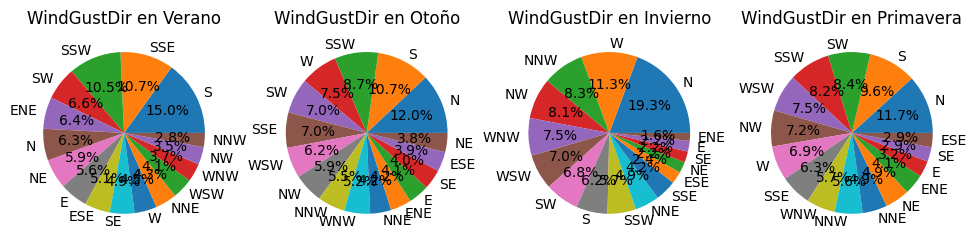

In [141]:
# Hacemos un grafico de torta por estacion para ver si hay alguna tendencia en cada estacion
df_verano = df_filtrado[df_filtrado['Estacion'] == 'Verano']
df_otoño = df_filtrado[df_filtrado['Estacion'] == 'Otoño']
df_invierno = df_filtrado[df_filtrado['Estacion'] == 'Invierno']
df_primavera = df_filtrado[df_filtrado['Estacion'] == 'Primavera']

counts_verano = df_verano['WindGustDir'].value_counts()
counts_otoño = df_otoño['WindGustDir'].value_counts()
counts_invierno = df_invierno['WindGustDir'].value_counts()
counts_primavera = df_primavera['WindGustDir'].value_counts()

plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.pie(counts_verano, labels=counts_verano.index, autopct='%1.1f%%')
plt.title('WindGustDir en Verano')

plt.subplot(1, 4, 2)
plt.pie(counts_otoño, labels=counts_otoño.index, autopct='%1.1f%%')
plt.title('WindGustDir en Otoño')

plt.subplot(1, 4, 3)
plt.pie(counts_invierno, labels=counts_invierno.index, autopct='%1.1f%%')
plt.title('WindGustDir en Invierno')

plt.subplot(1, 4, 4)
plt.pie(counts_primavera, labels=counts_primavera.index, autopct='%1.1f%%')
plt.title('WindGustDir en Primavera')

plt.show()


In [47]:
# Imputamos los valores de Humidity9am y Humidity3pm por fecha utilizando la mediana
mediana_Humidity9am = df_filtrado.groupby('Date')['Humidity9am'].median()
df_filtrado['Humidity9am'] = df_filtrado.apply(lambda x: mediana_Humidity9am[x['Date']] if pd.isnull(x['Humidity9am']) else x['Humidity9am'], axis=1)

mediana_Humidity3pm = df_filtrado.groupby('Date')['Humidity3pm'].median()
df_filtrado['Humidity3pm'] = df_filtrado.apply(lambda x: mediana_Humidity3pm[x['Date']] if pd.isnull(x['Humidity3pm']) else x['Humidity3pm'], axis=1)

In [48]:
# Verificamos que no hayan quedado nulos
df_filtrado['Humidity3pm'].isnull().sum()
df_filtrado['Humidity9am'].isnull().sum()

0

In [49]:
# Imputamos los valores de Pressure9am y Humidity3pm por fecha utilizando la mediana
mediana_Pressure9am = df_filtrado.groupby('Date')['Pressure9am'].median()
df_filtrado['Pressure9am'] = df_filtrado.apply(lambda x: mediana_Pressure9am[x['Date']] if pd.isnull(x['Pressure9am']) else x['Pressure9am'], axis=1)

mediana_Pressure3pm = df_filtrado.groupby('Date')['Pressure3pm'].median()
df_filtrado['Pressure3pm'] = df_filtrado.apply(lambda x: mediana_Pressure3pm[x['Date']] if pd.isnull(x['Pressure3pm']) else x['Pressure3pm'], axis=1)

In [50]:
# Verificamos que no hayan quedado nulos
df_filtrado['Pressure9am'].isnull().sum()
df_filtrado['Pressure3pm'].isnull().sum()

0

In [51]:
# Imputamos los valores de Temp9am y Temp3pm por fecha utilizando la mediana
mediana_Temp9am = df_filtrado.groupby('Date')['Temp9am'].median()
df_filtrado['Temp9am'] = df_filtrado.apply(lambda x: mediana_Temp9am[x['Date']] if pd.isnull(x['Temp9am']) else x['Temp9am'], axis=1)

mediana_Temp3pm = df_filtrado.groupby('Date')['Temp3pm'].median()
df_filtrado['Temp3pm'] = df_filtrado.apply(lambda x: mediana_Temp3pm[x['Date']] if pd.isnull(x['Temp3pm']) else x['Temp3pm'], axis=1)

In [52]:
# Verificamos que no hayan quedado nulos
df_filtrado['Temp9am'].isnull().sum()
df_filtrado['Temp3pm'].isnull().sum()

0

In [53]:
# Imputamos los valores de Cloud9am y Cloud3pm por fecha utilizando la mediana
mediana_Cloud9am = df_filtrado.groupby('Date')['Cloud9am'].median()
df_filtrado['Cloud9am'] = df_filtrado.apply(lambda x: mediana_Cloud9am[x['Date']] if pd.isnull(x['Cloud9am']) else x['Cloud9am'], axis=1)

mediana_Cloud3pm = df_filtrado.groupby('Date')['Cloud3pm'].median()
df_filtrado['Cloud3pm'] = df_filtrado.apply(lambda x: mediana_Cloud3pm[x['Date']] if pd.isnull(x['Cloud3pm']) else x['Cloud3pm'], axis=1)

In [54]:
# Verificamos que no hayan quedado nulos
df_filtrado['Cloud9am'].isnull().sum()
df_filtrado['Cloud3pm'].isnull().sum()

0

In [55]:
# Imputamos los valores de RainToday por fecha utilizando la moda (porque es un valor tipo object)
# Primero vamos a pasar los valores 
moda_RainToday = df_filtrado.groupby('Date')['RainToday'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df_filtrado['RainToday'] = df_filtrado['RainToday'].fillna(moda_RainToday)

In [56]:
# Verificamos que todos los valores tengan datos 
df_filtrado['RainToday'].isnull().sum()

0

In [57]:
# Imputamos los valores de RainTomorrow utilizando la moda porque es una variable categórica
moda_RainTomorrow = df_filtrado.groupby('Date')['RainTomorrow'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
df_filtrado['RainTomorrow'] = df_filtrado['RainTomorrow'].fillna(moda_RainTomorrow)

In [58]:
# Verificamos 
df_filtrado['RainTomorrow'].isnull().sum()

0

In [59]:
# Completamos los valores faltantes agrupando por dia 
mediana_RainfallTomorrow = df_filtrado.groupby('Date')['RainfallTomorrow'].median()
df_filtrado['RainfallTomorrow'] = df_filtrado.apply(lambda x: mediana_RainfallTomorrow[x['Date']] if pd.isnull(x['RainfallTomorrow']) else x['RainfallTomorrow'], axis=1)

In [60]:
# Verificamos 
df_filtrado['RainfallTomorrow'].isnull().sum()

0

([0, 1, 2, 3],
 [Text(0, 0, 'Verano'),
  Text(1, 0, 'Otoño'),
  Text(2, 0, 'Invierno'),
  Text(3, 0, 'Primavera')])

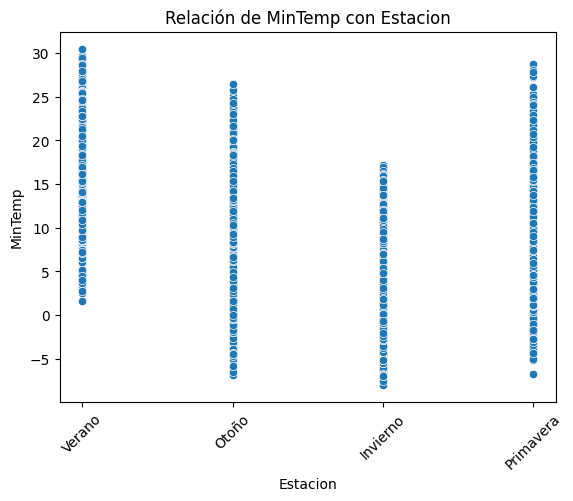

In [137]:
# Vemos como se ditribuye la temperatura mínima según las localidades para ver si podemos sacar la media según localidad
sns.scatterplot(x='Estacion', y='MinTemp', data=df_filtrado)
plt.xlabel('Estacion')
plt.ylabel('MinTemp')
plt.title('Relación de MinTemp con Estacion')
plt.xticks(rotation= 45)

In [102]:
# Armamos una función para determinar las estaciones del año (usamos las estaciones de australia) 
#Otoño: del 1 de marzo al 31 de mayo. 
#Invierno: del 1 de junio al 31 de agosto. 
#Primavera: del 1 de septiembre al 30 de noviembre. 
#Verano: del 1 de diciembre al 28 de febrero.
def determinar_estacion(fecha):
    # extraemos el mes
    mes = fecha.month
    # Determinamos las estaciones
    if  3<= mes <=5:
        return "Otoño"
    elif 6<= mes <= 8:
        return "Invierno"
    elif 9 <= mes <= 11:
        return "Primavera"
    else:
        return "Verano"

# Aplicamos la función determinar_estacion al DataFrame df_filtrado
df_filtrado['Estacion'] = df_filtrado['Date'].apply(lambda x: determinar_estacion(x))

# Mostramos el DataFrame con la nueva columna de estaciones
df_filtrado.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Todos_Iguales,Estacion
6047,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,20.0,ENE,...,1004.4,2.0,5.0,26.6,33.4,No,No,0.0,False,Verano
6048,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,19.0,SSE,...,1012.1,1.0,1.0,20.3,27.0,No,No,0.0,False,Verano
6049,2009-01-03,Cobar,15.5,34.1,0.0,12.6,13.3,SE,NaN,NaN,...,1011.6,NaN,1.0,NaN,32.7,No,No,0.0,False,Verano
6050,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,30.0,NNE,...,1009.2,1.0,6.0,28.7,34.9,No,No,0.0,False,Verano
6051,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,6.0,WNW,...,1009.1,1.0,5.0,29.1,35.6,No,No,0.0,False,Verano


In [65]:
# Antes de sacar la media por estación vamos a tener que dividir en train y test para no usar datos de test en los valores de train
df_filtrado.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,Todos_Iguales,Estacion
25036,2017-06-20,MountGambier,6.2,16.3,0.0,2.3,7.30,N,24.0,N,...,1024.1,6.0,4.0,8.7,15.5,No,Yes,2.0,False,Invierno
25037,2017-06-21,MountGambier,8.7,13.2,2.0,1.3,3.90,S,11.0,W,...,1028.3,2.0,8.0,11.1,12.0,Yes,No,0.0,False,Invierno
25038,2017-06-22,MountGambier,7.0,15.7,0.0,1.3,4.60,N,15.0,N,...,1022.4,8.0,2.0,10.0,14.9,No,No,0.0,False,Invierno
25039,2017-06-23,MountGambier,5.4,16.2,0.0,2.0,4.35,N,24.0,NNW,...,1014.4,8.0,4.0,6.4,14.9,No,Yes,2.2,False,Invierno
25040,2017-06-24,MountGambier,4.8,12.3,2.2,1.6,7.45,W,15.0,NNW,...,1018.0,5.0,8.0,8.2,11.5,Yes,No,0.6,False,Invierno


([0, 1, 2, 3],
 [Text(0, 0, 'Verano'),
  Text(1, 0, 'Otoño'),
  Text(2, 0, 'Invierno'),
  Text(3, 0, 'Primavera')])

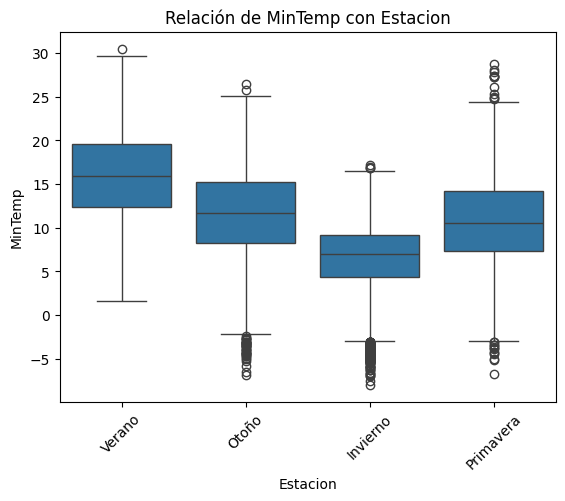

In [66]:
# Vemos como se ditribuye la temperatura mínima según las estaciones para ver si podemos sacar la media según estacion
sns.boxplot(x='Estacion', y='MinTemp', data=df_filtrado)
plt.xlabel('Estacion')
plt.ylabel('MinTemp')
plt.title('Relación de MinTemp con Estacion')
plt.xticks(rotation= 45)

([0, 1, 2, 3],
 [Text(0, 0, 'Verano'),
  Text(1, 0, 'Otoño'),
  Text(2, 0, 'Invierno'),
  Text(3, 0, 'Primavera')])

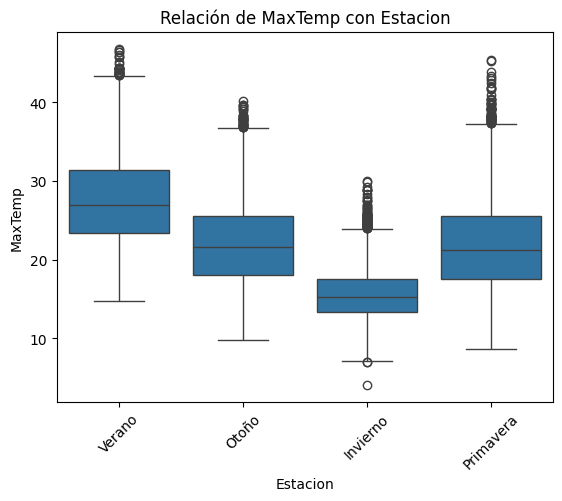

In [67]:
# Vemos como se ditribuye la temperatura maxima según las estaciones para ver si podemos sacar la media según estacion
sns.boxplot(x='Estacion', y='MaxTemp', data=df_filtrado)
plt.xlabel('Estacion')
plt.ylabel('MaxTemp')
plt.title('Relación de MaxTemp con Estacion')
plt.xticks(rotation= 45)

In [68]:
# Comprobamos si quedo algun valor nulo
df_filtrado.isnull().sum()

Date                  0
Location              0
MinTemp             568
MaxTemp             556
Rainfall              0
Evaporation           0
Sunshine              0
WindGustDir           4
WindGustSpeed       380
WindDir9am            0
WindDir3pm            0
WindSpeed9am          0
WindSpeed3pm          0
Humidity9am           0
Humidity3pm           0
Pressure9am           0
Pressure3pm           0
Cloud9am              0
Cloud3pm              0
Temp9am               0
Temp3pm               0
RainToday             0
RainTomorrow          0
RainfallTomorrow      0
Todos_Iguales         0
Estacion              0
dtype: int64

In [69]:
# Antes de completar los datos faltantes, dividimos nuestros datos en train y test
#como tenemos datos desde el 2009 hasta mediados de 2017 vamos a tomar como test el 20% de nuestros datos que sería aproximadamente 15 meses y para hacerlo un poco mas fácil nos quedamos con todo 2016 y todo 2017 como test y usamos el resto como train (es un 18% aprox de mi base de datos)
df_train = df_filtrado.loc[df_filtrado['Date'] < '2016-01-01']
df_test = df_filtrado.loc[df_filtrado['Date'] >= '2016-01-01']

In [100]:
# Los datos faltantes de las variables MinTemp y MaxTemp las rellenamos con la mediana de cada estación, 
#ya que en los respectivos boxplots podemos observar que hay outliers

# Lo hago para mis datos de entrenamiento 
mediana_MaxTemp_train = df_train.groupby('Estacion')['MaxTemp'].median()
for estacion in mediana_MaxTemp_train.index:
    df_train.loc[df_train['Estacion'] == estacion, 'MaxTemp'] = df_train.loc[df_train['Estacion'] == estacion, 'MaxTemp'].fillna(mediana_MaxTemp_train[estacion])

mediana_MinTemp_train = df_train.groupby('Estacion')['MinTemp'].median()
for estacion in mediana_MinTemp_train.index:
    df_train.loc[df_train['Estacion'] == estacion, 'MinTemp'] = df_train.loc[df_train['Estacion'] == estacion, 'MinTemp'].fillna(mediana_MinTemp_train[estacion])

# Y por separado para msi datos de test
mediana_MaxTemp_test = df_test.groupby('Estacion')['MaxTemp'].median()
for estacion in mediana_MaxTemp_test.index:
    df_test.loc[df_test['Estacion'] == estacion, 'MaxTemp'] = df_test.loc[df_test['Estacion'] == estacion, 'MaxTemp'].fillna(mediana_MaxTemp_test[estacion])

mediana_MinTemp_test = df_test.groupby('Estacion')['MinTemp'].median()
for estacion in mediana_MinTemp_test.index:
    df_test.loc[df_test['Estacion'] == estacion, 'MinTemp'] = df_test.loc[df_test['Estacion'] == estacion, 'MinTemp'].fillna(mediana_MinTemp_test[estacion])


In [71]:
print(df_train['MaxTemp'].isnull().sum())
print(df_train['MinTemp'].isnull().sum())
print(df_test['MaxTemp'].isnull().sum())
print(df_test['MinTemp'].isnull().sum())

0
0
0
0
